<a href="https://colab.research.google.com/github/vadim-vic/Signal-separation/blob/main/AlohaCollisionDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NEW! Updated version of report on Aloha Collision Detector is here
# https://drive.google.com/file/d/1nDBobwBmEUWzMXGpw4i5TC2kQFgms-Yc/view?usp=sharing

NEW! [Updated version of report on Aloha Collision Detector is here](https://drive.google.com/file/d/1nDBobwBmEUWzMXGpw4i5TC2kQFgms-Yc/view?usp=sharing)


In [ ]:
# Read the data files and import functions
import json
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Prepare a four-class classification dataset: noise, one, two and tree+ transmitters
# Assume that the signal amplitude attenuates proportionally to the distance to the reader and set
ATTEN = 0.5 # Fix the attenuation (assume the original signals already attenuate)
N = 1000 # Each class sample size
CLS = 4 # Number of classes
# Test case N = 1 CLS = 2
# Create empty datasets to fill with the mixures
Xsrc4 = np.empty((0, iqdata.shape[1]), dtype=complex)
Ysrc4 = np.empty(0)
# Randomly select indices from the sample set
n = len(iqdata) # Occurs below frequently
for c in range(CLS): # For 4 classes
  idx = np.random.choice(n, n, replace=False) # Choose index of the noise sample
  xmixture = iqnoise[idx] # Noise presents in any class
  # CLS is the number of the components in the mixture
  if c == 3:
    cls_mix = 5 # Let 3,4, or 5 mix together with probability 1/3
  else:
    cls_mix = c
  for c_mix in range(cls_mix):
    print('Class:', c, 'In mixture:', c_mix+1)
    idx = np.random.choice(n, n, replace=False) # Random data indices
    idx_zeroed = np.random.choice(idx, np.array([n // (1/0.7)], dtype = int) , replace=False)
    # Attenuation for now is equal due to the previoius signal scaling
    incoming = ATTEN * iqdata[idx]
    if c_mix > 2: # Random mixture with probability 1/3 for a row
      incoming[idx_zeroed,:] = 0
    xmixture = xmixture + incoming # Add to the mixture
    # Plot the dataset to get an overview
    # plt.imshow(incoming.real[900:999], cmap="viridis", interpolation="nearest") #Xsrc4.imag[950:1050,:]
    #plt.show()
  Xsrc4 = np.append(Xsrc4, xmixture, axis=0) # Store a mixture
  Ysrc4 = np.append(Ysrc4, c * np.ones(n)) # Store the class label

Class: 1 In mixture: 1
Class: 2 In mixture: 1
Class: 2 In mixture: 2
Class: 3 In mixture: 1
Class: 3 In mixture: 2
Class: 3 In mixture: 3
Class: 3 In mixture: 4
Class: 3 In mixture: 5


In [ ]:
# An alternative data generationa procedure with scaling and class balancing
# delivers the same resutls, so it is recommended to stick the the basic

In [ ]:
# @title
'''
# Four-class classification, data generation
MAX_MIX = 6 # Maximum number of mixtures signals
MAX_AMP = 0.3 # V Minimum and maximum RMS amplitude of I/Q data signal
MIN_AMP = 1.2 # V

# Set a new data structure (dict or dataframe wait)
db_data = np.empty((0, iqdata.shape[1]), dtype=complex)
db_label = []
db_sourc = []
db_basis = []
db_coeff = []
db_shift = []

# Generate four classes: 0, 1, 2, 3, probably imbalanced
new_cls_size = [1000,1000,1000,1000] # Set small variables for demo mode

# For each class # Generate the sample set as a mixture of signals
for cls, sample_size in enumerate(new_cls_size):
  for _ in range(sample_size):
    # For each new item in the sample set prepare a mixture
    # How many items are in the mixture?
    if cls < 3: # 0: just noise, 1: single signal, 2: two signals
      cls_mix = cls
    else:
      cls_mix = np.random.choice(list(range(3,MAX_MIX))) # 3 or more signals

    # Each transmitter sends its unique code (no identical sources)
    idx_clus = np.random.choice(list(dict_cluster.keys()), cls_mix, replace=False)
    idx_src = [np.random.choice(dict_cluster.get(i), 1)[0] for i in idx_clus]

    coeffs = np.random.uniform(MIN_AMP, MAX_AMP, size=len(idx_src))
    signals = iqdata[idx_src]
    signals = scale_complex(signals, coeffs)

    mixture = iqnoise[np.random.choice(iqnoise.shape[0])] # A mixtire has its noise
    mixture = mixture + np.sum(signals, axis=0)

    # Counting shifts from the basis vectores
    shfits = []
    for i, j in zip(idx_clus, idx_src):
      x = iqdata[i] # Cluster as basis
      y = iqdata[j] # To approximate
      #err_min, best_b, best_shift = find_shiftX_exhaust(x, np.array([]), y, 7)
      shfits.append(0)
      # x1 = shift_x(x, best_shift)
      # print(f'Class: {cls}, centroid: {i}, source: {j}, shift: {best_shift})')

    # Store all: mixture, its class, its sources, its coeffs
    db_data = np.vstack((db_data, mixture))
    db_label.append(cls)
    db_sourc.append(idx_src)
    db_basis.append(idx_clus)
    db_coeff.append(coeffs)
    db_shift.append(shfits)
    # print(f'Append class: {cls}, centroids: {idx_clus}, sources: {idx_src}, mixture coefficients: {coeffs}, shifts: {shfits}')

# The previous format of the dataset
Xsrc4 = db_data.copy()
Ysrc4 = db_label.copy()
Yidx16 = db_sourc.copy()# Four-class classification, data generation
MAX_MIX = 6 # Maximum number of mixtures signals
MAX_AMP = 0.3 # V Minimum and maximum RMS amplitude of I/Q data signal
MIN_AMP = 1.2 # V

# Set a new data structure (dict or dataframe wait)
db_data = np.empty((0, iqdata.shape[1]), dtype=complex)
db_label = []
db_sourc = []
db_basis = []
db_coeff = []
db_shift = []

# Generate four classes: 0, 1, 2, 3, probably imbalanced
new_cls_size = [1000,1000,1000,1000] # Set small variables for demo mode

# For each class # Generate the sample set as a mixture of signals
for cls, sample_size in enumerate(new_cls_size):
  for _ in range(sample_size):
    # For each new item in the sample set prepare a mixture
    # How many items are in the mixture?
    if cls < 3: # 0: just noise, 1: single signal, 2: two signals
      cls_mix = cls
    else:
      cls_mix = np.random.choice(list(range(3,MAX_MIX))) # 3 or more signals

    # Each transmitter sends its unique code (no identical sources)
    idx_clus = np.random.choice(list(dict_cluster.keys()), cls_mix, replace=False)
    idx_src = [np.random.choice(dict_cluster.get(i), 1)[0] for i in idx_clus]

    coeffs = np.random.uniform(MIN_AMP, MAX_AMP, size=len(idx_src))
    signals = iqdata[idx_src]
    signals = scale_complex(signals, coeffs)

    mixture = iqnoise[np.random.choice(iqnoise.shape[0])] # A mixtire has its noise
    mixture = mixture + np.sum(signals, axis=0)

    # Counting shifts from the basis vectores
    shfits = []
    for i, j in zip(idx_clus, idx_src):
      x = iqdata[i] # Cluster as basis
      y = iqdata[j] # To approximate
      #err_min, best_b, best_shift = find_shiftX_exhaust(x, np.array([]), y, 7)
      shfits.append(0)
      # x1 = shift_x(x, best_shift)
      # print(f'Class: {cls}, centroid: {i}, source: {j}, shift: {best_shift})')

    # Store all: mixture, its class, its sources, its coeffs
    db_data = np.vstack((db_data, mixture))
    db_label.append(cls)
    db_sourc.append(idx_src)
    db_basis.append(idx_clus)
    db_coeff.append(coeffs)
    db_shift.append(shfits)
    # print(f'Append class: {cls}, centroids: {idx_clus}, sources: {idx_src}, mixture coefficients: {coeffs}, shifts: {shfits}')

# The previous format of the dataset
Xsrc4 = db_data.copy()
Ysrc4 = db_label.copy()
Yidx16 = db_sourc.copy()
'''

In [ ]:
# Read the uploaded files with data and noise
with open('inphase_quadrature_data.json') as f:
  data = np.array(json.load(f))
with open('inphase_quadrature_noise.json') as f:
  noise = np.array(json.load(f))
# Convert in-phase and quadrature signals to the complex-valued
iqdata = data[:,0,:] + 1j*data[:,1,:]
iqnoise = noise[:,0,:] + 1j*noise[:,1,:]
# All operations below will be in the complex space

In [ ]:
# The following cell loads functions

In [ ]:
# @title
# * Collection of functions for I/D data signal processing
# The singal dtype=complex
import numpy as np
import matplotlib.pyplot as plt

def shift_x(x, shift):
  # Shift a vector to several positions, replacing the gap with zeroes
  if shift < 0:
    sft_x = np.pad(x[:len(x) + shift], (abs(shift), 0), 'constant', constant_values=0)
  else:
    sft_x = np.pad(x[shift:], (0, shift), 'constant', constant_values=0)
  return sft_x

# Version (exhaustive) of Wednesday 12th, goes from 9_Distance_to_7bit
from scipy.linalg import lstsq

def find_lsq_shift_exhaust(x, y, N):
  # Semor, two-pametric (scale, shift) self-modeling regression
  # Find the best phase of the scaled y to minimize the distance to x
  # N is the maximum allowed phase shift in either direction
  # Works for complex-valued vectors
  # Returns original shifted y, shift of x and scale of x
  err_min = float('inf')
  best_shift = 0

  # The shifting subfunction puts zeroes to the both ends of the signal
  def shift_it(y, len_x, shift):
    if shift < 0:
      shifted_y = np.pad(y[:len_x + shift], (abs(shift), 0), 'constant', constant_values=0)
    else:
      shifted_y = np.pad(y[shift:], (0, shift), 'constant', constant_values=0)
    return shifted_y

  # Scale y according to x and return the distance
  def lsq_xy(x, y):
    b, err, rank, s = lstsq(np.column_stack([x]), y)
    return b[0], err # Distance and scaled (and shifted)

  len_x = len(x)
  # Exhaustive search for +- N
  for shift in range(-N, N + 1):
    shifted_y = shift_it(y, len_x, shift)
    b0, err_0 = lsq_xy(x, shifted_y) # Currest distance
    # print('Shift', shift * shift_dir, 'Err', err_0, 'min', err_min)
    if err_0 < err_min:
      err_min = err_0
      best_b0 = b0
      best_shift = shift
  return err_min, best_b0, -1 * best_shift

def scale_x2max(x, amp = 1 + 1j):
  # The expected amplitude of the iqdata is between 0.3 and 1.2 V. Set amp to 1 V
  # Works with dtype=complex
  if np.all(x == 0):
        raise ValueError("Scaling is impossible for a zero vector x.")
  z = np.zeros(len(x), dtype=complex)
  z.real = amp.real * x.real / np.max(np.abs(x.real))
  z.imag = amp.imag * x.imag / np.max(np.abs(x.imag))
  return z

def plot_AUC(auc, accuracy, fpr, tpr):
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
  plt.rcParams['font.family'] = 'DejaVu Serif'
  plt.rcParams['lines.linewidth'] = 2
  #plt.rcParams['lines.markersize'] = 12
  plt.rcParams['xtick.labelsize'] = 12#24
  plt.rcParams['ytick.labelsize'] = 12#24
  plt.rcParams['legend.fontsize'] = 12#24
  #plt.rcParams['axes.titlesize'] = 36.
  plt.rcParams['axes.labelsize'] = 12#24
  plt.gca().set_aspect('equal')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.tight_layout()
  plt.legend(loc='lower right')
  plt.show()
  return plt

  #* Collection of functions with imports of bib libraries
import matplotlib.pyplot as plt
# ** Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
#------------------------------------------------------------------
#------------------------------------------------------------------
def get_LogRegression_AUC(X,y, is_scaler = False):
  # Returns auc and acc on the test dataset
  # Split into training and testing sets
  if is_scaler:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
  # Split into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  # Logistic regression
  model = LogisticRegression() # Create the logistic regression model
  model.fit(X_train, y_train) # Train the model
  y_pred = model.predict(X_test) # Make predictions
  y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  #print("Accuracy (logistic regression):", accuracy)
  #print("Classification Report:\n", report)

  # Calculate and plot ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  auc = roc_auc_score(y_test, y_pred_proba)
  return auc, accuracy, fpr, tpr
 #------------------------------------------------------------------
 #------------------------------------------------------------------
def get_kNClassifier_AUC(X,y, is_scaler = True):
  if is_scaler:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
  # Split into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  # Create a KNN classifier
  knn = KNeighborsClassifier(n_neighbors=5)  # The number of neighbors, k
  knn.fit(X_train, y_train) # Fit the model
  y_pred = knn.predict(X_test) # Make predictions
  auc = roc_auc_score(y_test, y_pred)
  # Calculate AUC score and accuracy
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  return auc, accuracy, report

#def make_mixture(Xdata, xnoise, attenuation = 0.6):
#  # The function returns a mixture of noise and severas (cls) signals
#  # The noise adds to any class of the signals
#  xmixture = xnoise # All is added up to the noise
#  for i in range(len(Xdata)):
#    xmixture = xmixture + attenuation * Xdata[i]
#  return xmixture #, Mixdata # Return a vector to the dataset
## Show the selected source and the mixture

# Generate the metric features: compute the distance from an object to each centroid
idx_centroids = {769, 514, 5, 522, 12, 536, 792, 28, 796, 288, 291, 40, 41, 828, 324, 327, 843, 588, 595, 852, 342, 601, 859, 354, 360, 617, 877, 109, 629, 891, 380, 639, 385, 903, 648, 652, 914, 918, 919, 408, 158, 160, 929, 940, 173, 689, 690, 434, 956, 445, 962, 457, 970, 458, 974, 208, 469, 984, 217, 731, 484, 483, 496, 761}
iqlib = iqdata[list(idx_centroids)]

# Generate the metric features: compute distance from an object to each centroid
SHIFT_MAX = 7
def metric_features(Xsrc, iqlib, SHIFT_MAX):
  Xdist = np.empty((len(Xsrc), len(iqlib)))
  Xrbf = np.empty((len(Xsrc), len(iqlib)))
  Gamma = 1.0
  for i in range(len(Xsrc)):
    for j in range(len(iqlib)):
      err, b0, sh0 = find_lsq_shift_exhaust(iqlib[j], Xsrc[i], SHIFT_MAX)
      Xdist[i,j] = err
      # Radial Basis Function for classification
      Xrbf[i,j] = np.exp(-Gamma * Xdist[i,j]**2)
  return Xrbf, Xdist

def dist_to_noise(x, win_max=7, win_step=4):
# Test for noise by sliding window (replace for autocorrellation)
# WIN_MAX = 7, WIN_STEP = 4, FIXIT procedure will be replaced
  max_mu = 0
  for t in range(win_max, len(x)-win_max, win_step): # get rid of the first and last window
    mu =  np.mean(x[t:t+win_max])
    # print(mu)
    if mu > max_mu:
      max_mu = mu
  return np.abs(max_mu)**2

def noise_feature(Xsrc):
  Xdist = np.empty((len(Xsrc),1))
  Xrbf = np.empty((len(Xsrc), 1))
  Gamma = 1.0 #FIXIT
  for i in range(len(Xsrc)):
      err = dist_to_noise(Xsrc[i])
      Xdist[i] = err
      # Radial Basis Function for classification
      Xrbf[i] = np.exp(-Gamma * Xdist[i]**2)
  return Xrbf, Xdist

In [ ]:
# Radial basis functions construct feature space (it runs 4 min, speeds up with gradient phase shft)
SHIFT_MAX = 7
Xrbf, Xdist = metric_features(Xsrc4, iqlib, SHIFT_MAX)
Xn_rbf, Xn_dist = noise_feature(Xsrc4)
Xfea = np.hstack((Xrbf,Xn_rbf)) # Join the features

In [ ]:
# @title
def make_dataset(X, Y, vs):
  cls0 = vs[0]
  cls1 = vs[1]
  #print(cls0,cls1)
  idx0 = np.where(np.isin(Y, np.array(cls0)))[0]
  idx1 = np.where(np.isin(Y, np.array(cls1)))[0]
  idx01 = np.concatenate((idx0, idx1), axis=0)
  # Y_copy = Y.copy()
  Y_copy = np.array(Y.copy())
  Y_copy[idx0] = 0
  Y_copy[idx1] = 1
  Y2 = Y_copy[idx01]
  X2 = X[idx01]

  #plt.plot(Ysrc4)
  #plt.show()
  #plt.plot(Ysrc2)
  #plt.show()
  return X2, Y2

In [ ]:
# Make a classification schedule
schedule = [
    [[0],[1,2,3]], # Noise versus all
    [[1],[2]], # Single versus collision
    [[0,1],[2]], # Single versus collision
    [[1],[2,3]], # Single versus collision
    [[0,1,2],[3]], # Severe collision versus all
    [[1],[0,2,3]], # Single versis all kNN ok, FIX logreg
    [[2],[0,1,3]]] # Single versis all kNN ok, FIX logreg
Xfea4 = Xfea.copy() # For the experiment

# Run the schedule
for vs in schedule:
  X, y = make_dataset(Xfea4, Ysrc4, vs)
  auc, accuracy, fpr, tpr = get_LogRegression_AUC(X,y)
  print('Classes:', vs)
  # plot_AUC(auc, accuracy, fpr, tpr)
  #------------------------------------------------------------------
  auc, accuracy, report = get_kNClassifier_AUC(X,y)
  print('AUC (kNN):', auc, 'Accuracy (kNN):', accuracy)
  print("Classification Report:\n", report)

Classes: [[0], [1, 2, 3]]
AUC (kNN): 0.9940345713833152 Accuracy (kNN): 0.993
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       267
         1.0       1.00      0.99      1.00       733

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Classes: [[1], [2]]
AUC (kNN): 0.9542441273958783 Accuracy (kNN): 0.954
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       257
         1.0       0.94      0.96      0.95       243

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

Classes: [[0, 1], [2]]
AUC (kNN): 0.9655159708177419 Accuracy (kNN): 0.9666666666666667
Classification Report:
               precision    recall  f

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Four-class classification
X = Xdist
y = list(Ysrc4)

# auc, accuracy, report = get_kNClassifier_AUC(X,y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # The number of neighbors, k
knn.fit(X_train, y_train) # Fit the model
y_pred = knn.predict(X_test) # Make predictions
# auc = roc_auc_score(y_test, y_pred)
# Calculate AUC score and accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('AUC (kNN):', auc, 'Accuracy (kNN):', accuracy)
print("Classification Report:\n", report)

AUC (kNN): 0.6492276877641012 Accuracy (kNN): 0.741
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       267
         1.0       0.76      0.72      0.74       257
         2.0       0.49      0.45      0.47       241
         3.0       0.69      0.77      0.73       235

    accuracy                           0.74      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.74      0.74      0.74      1000



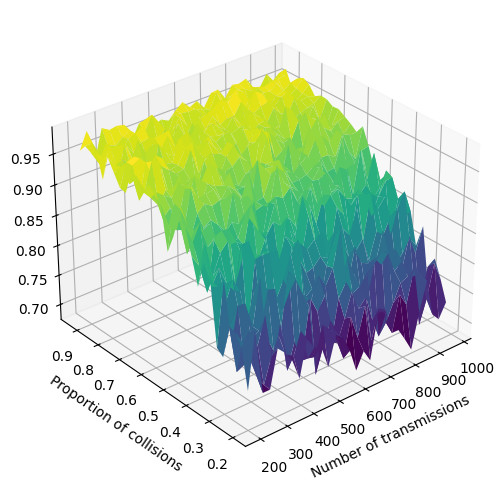

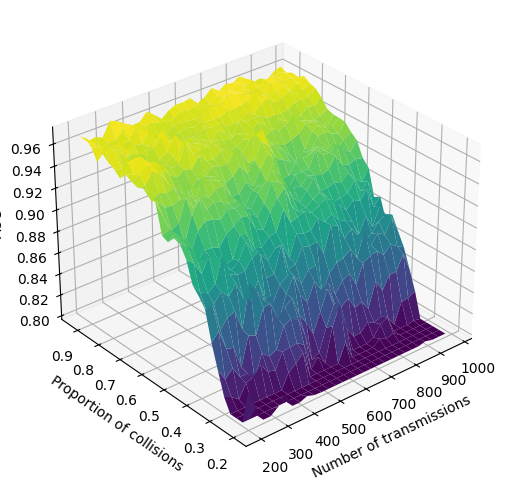

In [ ]:
# Plot the blances classes

Xrbf_copy, Ysrc_copy = make_dataset(Xrbf, Ysrc4, [[1],[2,3]])

DSIZE = 1000
sample_sizes = np.linspace(200, DSIZE, 30, dtype=int)
class_ratios = np.linspace(0.2, 0.95, 30)

pltX, pltY = np.meshgrid(sample_sizes, class_ratios)
pltZauc = np.empty(pltX.shape)
pltZacc = np.empty(pltX.shape)

for sample_size, i in zip(sample_sizes, range(len(sample_sizes))):
  for class_ratio, j in zip(class_ratios, range(len(class_ratios))):
    # Select random ss and ss/cr elements from the dataset
    indices_0 = np.random.choice(DSIZE, sample_size, replace=False)
    indices_1 = DSIZE + np.random.choice(DSIZE, int(sample_size * class_ratio), replace=False)
    indices = np.concatenate((indices_0, indices_1))
    # print(len(indices_0), len(indices_1), len(indices))
    Xcut = Xrbf_copy[indices]
    Ycut = Ysrc_copy[indices]
    auc, accuracy, report = get_kNClassifier_AUC(Xcut,Ycut)
    pltZauc[i,j] = auc
    pltZacc[i,j] = accuracy

# Smooth the mechgrid a little to understand the structire of the surface

pltZsmooth = np.empty(pltX.shape)
for i in range(len(pltX)-1):
  for j in range(len(pltX)-1):
    if j == 0:
      vec = np.array([
          pltZauc[i,j],
          pltZauc[i-1,j],
          pltZauc[i+1,j],
          pltZauc[i,j+1],
          pltZauc[i+1,j+1]])
    elif i+j == 0:
      vec = np.array([
          pltZauc[i,j],
          pltZauc[i+1,j],
          pltZauc[i,j+1],
          pltZauc[i+1,j+1]])
    else:
      vec =np.array([
          pltZauc[i,j],
          pltZauc[i,j-1],
          pltZauc[i,j+1],
          pltZauc[i-1,j],
          pltZauc[i+1,j]])
    mean_val = np.mean(vec)
    if mean_val < 0.8:
      # Report the mean value and put it to the minimum
      # print('mean value is low, please check')
      mean_val = 0.8
    pltZsmooth[i,j] = mean_val
    # print(i,j, vec, pltZsmooth[i,j])

# Remove the last row and columns
pltX = pltX[:-1, :-1]
pltY = pltY[:-1, :-1]
pltZsmooth = pltZsmooth[:-1, :-1]
pltZauc = pltZauc[:-1, :-1]
pltZacc = pltZacc[:-1, :-1]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# ax.plot_wireframe(pltX, pltY, pltZauc, color='red')
ax.plot_surface(pltX, pltY, pltZauc, cmap='viridis')
#ax.plot_surface(pltX, pltY, pltZsmooth, cmap='viridis')
ax.set_xlabel('Number of transmissions')
ax.set_ylabel('Proportion of collisions')
ax.set_zlabel('AUC', rotation=90)
ax.view_init(elev=30, azim=230)
#ax.set_zlim(0.8, 1)
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# ax.plot_wireframe(pltX, pltY, pltZauc, color='red')
# ax.plot_surface(pltX, pltY, pltZauc, cmap='viridis')
ax.plot_surface(pltX, pltY, pltZsmooth, cmap='viridis')
ax.set_xlabel('Number of transmissions')
ax.set_ylabel('Proportion of collisions')
ax.set_zlabel('AUC', rotation=90)
ax.view_init(elev=30, azim=230)
#ax.set_zlim(0.8, 1)
plt.show()